# Clase 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Vamos a usar un dataset clásico para empezar a aprender técnicas de visualización. Se trata del Boston Housing Dataset. Recopilado en 1976 y publicado en el Paper [Hedonic Housing Prices and the Demand for Clean Air](https://www.law.berkeley.edu/files/Hedonic.PDF)

Consiste en mediciones de distintas zonas del área de Boston, teniendo como variables independientes un conjunto de mediciones de la habitabilidad de dichas zonas, y como variable independiente el valor medio de las casas en dicha zona.

En concreto vamos a usar un [dataset actualizado](http://lib.stat.cmu.edu/datasets/boston_corrected.txt) que incluye la geolocalización estimada de las mediciones.

In [4]:
import pandas as pd
df = pd.read_csv("data/boston_dataset.csv")
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

### Cómo elegir el gráfico

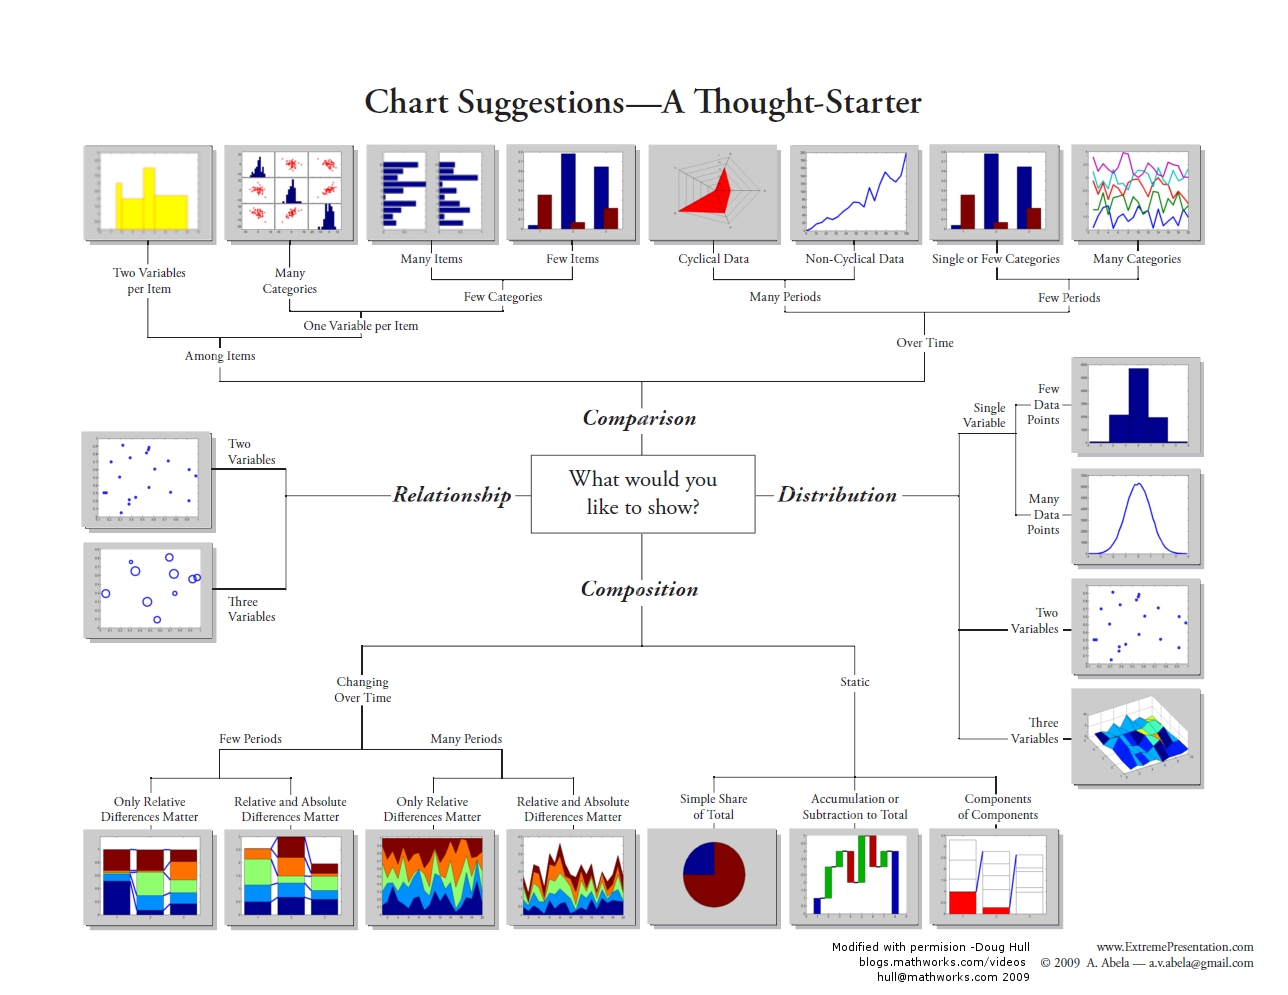

In [11]:
from IPython.display import Image
Image("data/andrew-abela-chart-chooser-in-color.jpg")


[Aquí hay una herramienta online para ayudar a decidir el tipo de gráfico a usar](http://labs.juiceanalytics.com/chartchooser/index.html)

Pandas usa [matplotlib](https://matplotlib.org/) como backend. [Aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) está la documentación de visualización de Pandas

In [12]:
import matplotlib.pyplot as plt

### Scatter Plot / gráfico de dispersión

Los gráficos de dispersión son una de las mejores formas de representar la relación entre dos variables

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

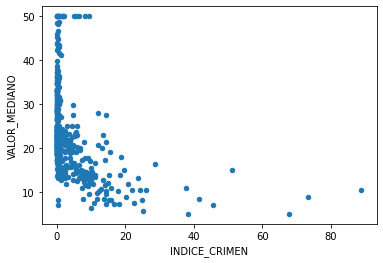

In [13]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

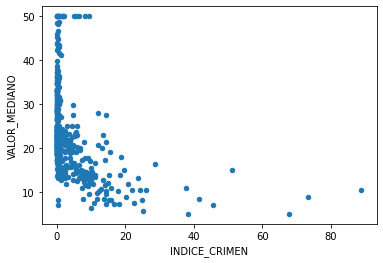

In [16]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")
# es lo mismo que 
# df.plot(x="INDICE_CRIMEN", y="VALOR_MEDIANO", kind="scatter")

<div style="color:blue" class="alert alert-block alert-warning">
La manera actual de hacer plots es la siguiente:
</div>

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

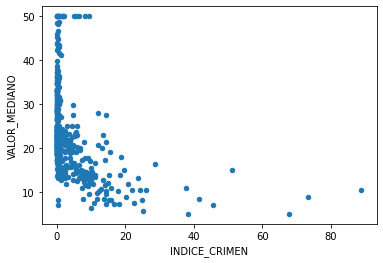

In [17]:
df.plot(x="INDICE_CRIMEN", y="VALOR_MEDIANO", kind="scatter")
# anteriormente df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

### Histograma

Los histogramas se usan para representar la distribucion de una variable, esto es, que rango de valores tiene, cuales son los valores más comunes

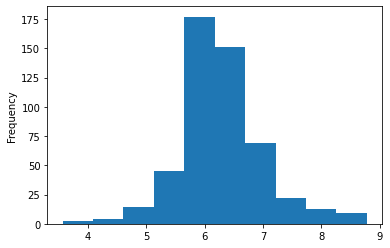

In [31]:
#anteriormente: df.N_HABITACIONES_MEDIO.plot.hist()
df.N_HABITACIONES_MEDIO.plot(kind='hist');

podemos especificar cuantos grupos queremos en el histograma

<AxesSubplot:ylabel='Frequency'>

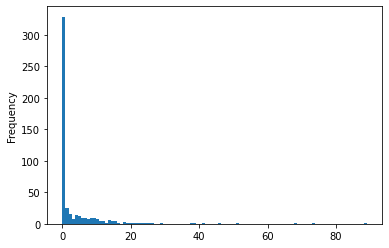

In [33]:
# anteriormente: df.INDICE_CRIMEN.plot.hist(bins=100)
df.INDICE_CRIMEN.plot(kind="hist", bins=100)

Tambien podemos filtrar el gráfico poniendo límites a los ejes

<AxesSubplot:ylabel='Frequency'>

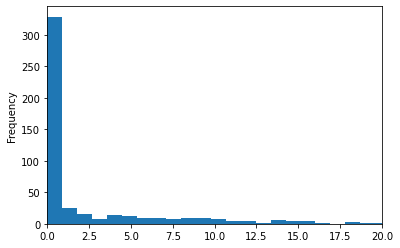

In [34]:
# anteriormente: df.INDICE_CRIMEN.plot.hist(bins=100, xlim=(0,20))
df.INDICE_CRIMEN.plot(kind="hist", bins=100, xlim=(0,20))

### Gráfico de barras/columnas

Los gráficos de barras se utilizan comúnmente para representar y comparar una variable entre distintos grupos

In [35]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head()

CIUDAD
Arlington    25.2
Ashland      21.4
Bedford      30.1
Belmont      36.2
Beverly      20.8
Name: VALOR_MEDIANO, dtype: float64

<AxesSubplot:xlabel='CIUDAD'>

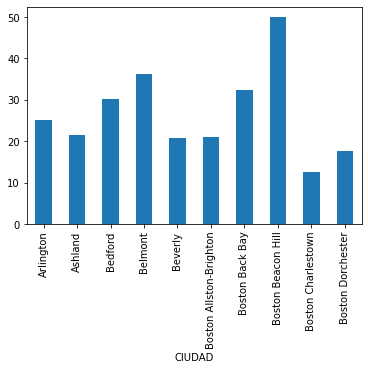

In [36]:
#  anteriormente: valor_por_ciudad.head(10).plot.bar()
valor_por_ciudad.head(10).plot(kind="bar")

<AxesSubplot:ylabel='CIUDAD'>

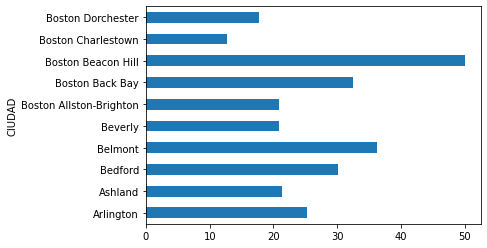

In [37]:
# anteriormente: valor_por_ciudad.head(10).plot.barh()
valor_por_ciudad.head(10).plot(kind="barh")

## Gráfico de linea

Los gráficos de linea se usan principalmente para representar tendencias, esto es, se usan para variables que varian con el tiempo


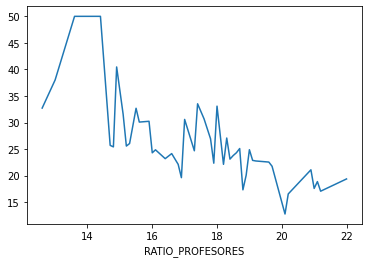

In [38]:
# pandas intenta deducir que tipo de grafico queremos en base a los datos usados
# en este caso con una serie normal de pandas(no hace falta especificar kind="line")
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot();

### Diagrama de caja (Box Plot)

Los diagramas de caja son útiles a la hora de representar grupos de datos y comparar entre ellos. Otra ventaja de los boxplots es que identifican de forma sencilla si una variable tiene muchos outliers, esto es, elementos que se alejan de los valores frecuentes de dicha variable.

In [45]:
df["VALOR_CUANTILES"] = pd.qcut(df.VALOR_MEDIANO, 5)
df["VALOR_CUANTILES"]

0      (22.7, 28.2]
1      (19.7, 22.7]
2      (28.2, 50.0]
3      (28.2, 50.0]
4      (28.2, 50.0]
           ...     
501    (19.7, 22.7]
502    (19.7, 22.7]
503    (22.7, 28.2]
504    (19.7, 22.7]
505    (15.3, 19.7]
Name: VALOR_CUANTILES, Length: 506, dtype: category
Categories (5, interval[float64, right]): [(4.999, 15.3] < (15.3, 19.7] < (19.7, 22.7] < (22.7, 28.2] < (28.2, 50.0]]

<AxesSubplot:title={'center':'INDICE_CRIMEN'}, xlabel='VALOR_CUANTILES'>

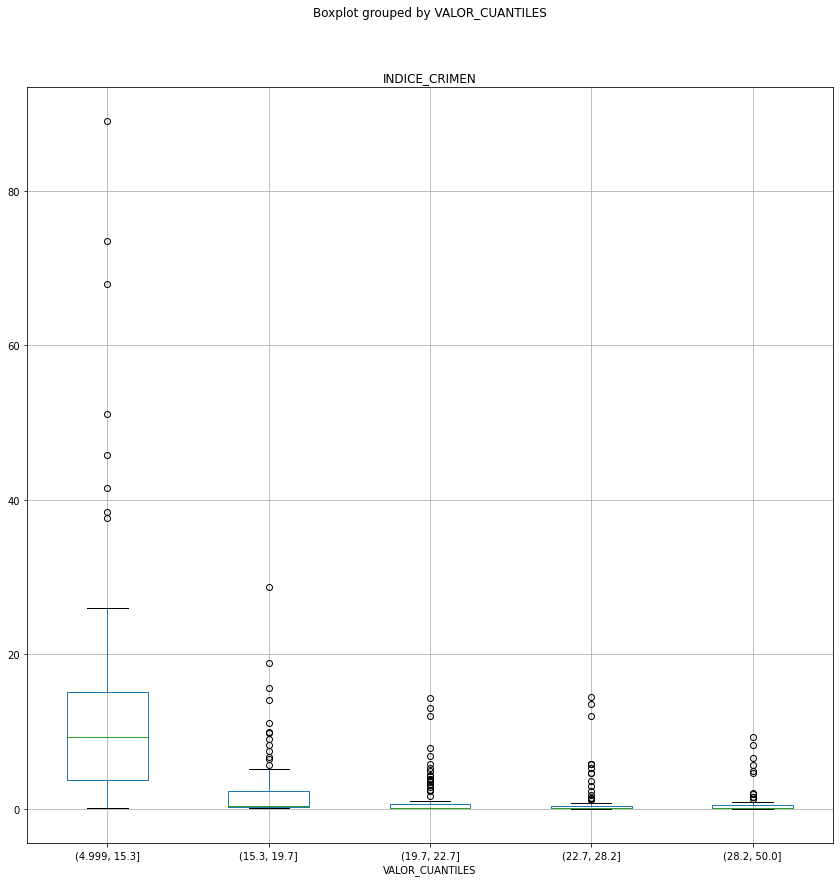

In [57]:
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES", figsize=(14,14))

### Gráfico circular

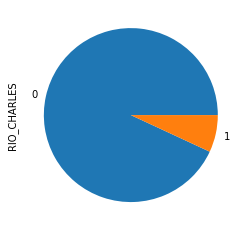

In [59]:
# anteriormente: df.RIO_CHARLES.value_counts().plot.pie()
df.RIO_CHARLES.value_counts().plot(kind="pie");

## Subgráficos

In [2]:
df_lluvias = pd.read_csv('./data/pune_1965_to_2002.csv')
df_lluvias.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


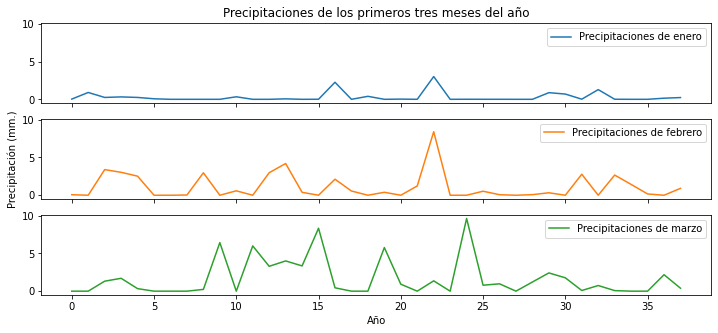

In [64]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')

ax[0].set_title('Precipitaciones de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Precipitación (mm.)')

ax[0].legend()  
ax[1].legend()
ax[2].legend()  

## Personalizando Matplotlib

In [74]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [87]:
mpl.rcParams['axes.titleweight'] = 'bold' 
mpl.rcParams['axes.titlelocation'] = 'left' 
mpl.rcParams['axes.titlecolor'] = 'firebrick' 
mpl.rcParams['axes.labelcolor'] = 'blue' 
mpl.rcParams['axes.labelsize'] = '10' 
mpl.rcParams['axes.labelweight'] = 'light' 
mpl.rcParams['axes.linewidth'] = '1' 
mpl.rcParams['grid.color'] = 'black' 
mpl.rcParams['grid.linestyle'] = '-.' 
mpl.rcParams['grid.linewidth'] = '2' 
mpl.rcParams['axes.grid'] = True

Text(0, 0.5, '(Etiqueta eje vert.)')

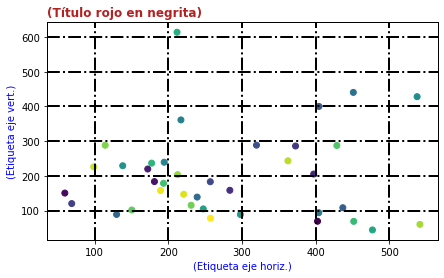

In [88]:
fig, ax = plt.subplots(figsize=(7, 4))  
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

Otra forma de modificar los parámetros es mediante plt.rc

In [90]:
plt.rc('axes', titlelocation='left', titlecolor='firebrick')
plt.rc('grid', color='black', linestyle='-.')

Es posible restablecer los parámetros por defecto

In [91]:
mpl.rcParams.update(mpl.rcParamsDefault)

## La librería Seaborn



### [Seaborn](https://seaborn.pydata.org)

Una de las principales ventajas de seaborn es que permiten hacer graficos cientificos "estandar" de forma facil. [Aquí](http://seaborn.pydata.org/examples/index.html) hay una galeria con ejemplos de gráficos hechos con seaborn.

In [3]:
import seaborn as sns
sns.__version__

'0.11.2'

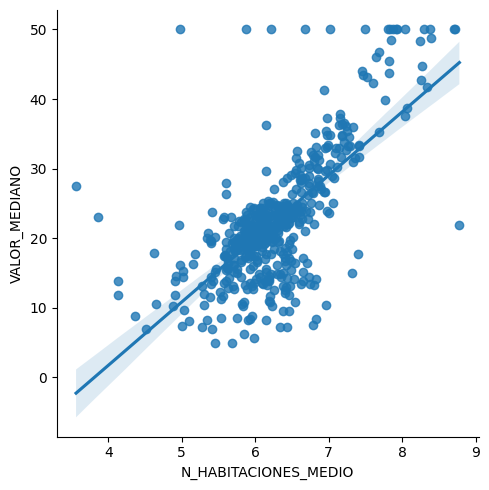

In [93]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

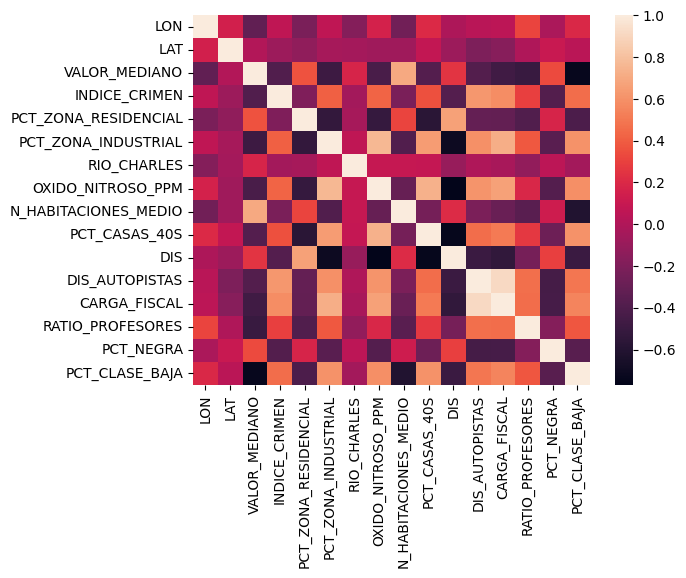

In [95]:
sns.heatmap(df.corr());

 Seaborn trae algunos datasets de prueba, exploremos uno:

In [97]:
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Observemos la distribución de las mediciones luego de 30 minutos de realizar el ejercicio.
1. Extraigamos sólo aquellas observaciones que se corresponden con un ejercicio de 30 minutos

In [101]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


2. Graficamos las distribuciones con sns.displot

<Figure size 640x480 with 0 Axes>

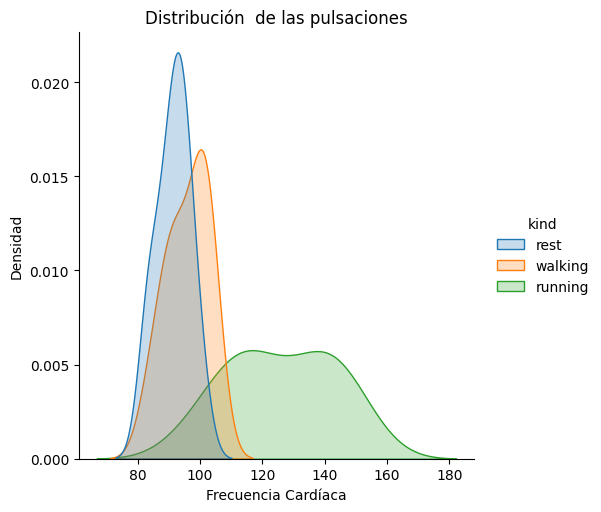

In [102]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

Como era de esperar, aquellas personas que corrieron terminaron (en promedio) con una mayor frecuencia cardíaca respecto de las que no lo hicieron😅

Con el parámetro kind='kde', Seaborn realiza una estimación de la distribución a partir de los datos del Data Frame. A grandes rasgos, se puede pensar a este tipo de gráficos como una versión suavizada del histograma de frecuencias relativas.
Con el parámetro kind='hist', Seaborn graficará un histograma.
El parámetro fill añade el sombreado debajo de la distribución

Para comparar las distribuciones en base a las dietas, sólo hay que cambiar el parámetro hue

<Figure size 640x480 with 0 Axes>

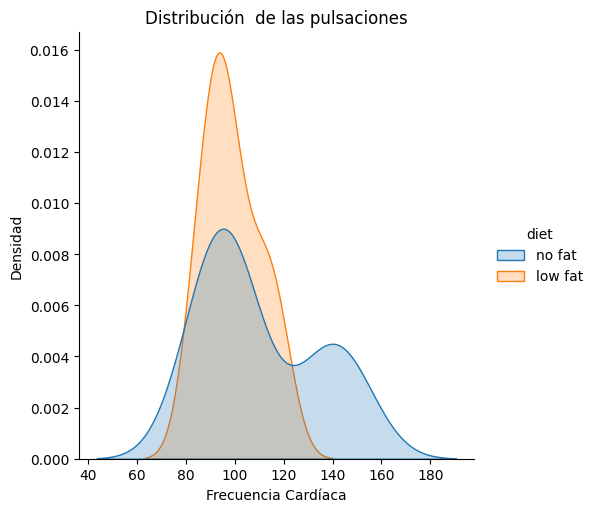

In [104]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='diet', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

## Seaborn: Categorical Plots

Visualicemos las pulsaciones en base a la duración de la actividad y al tipo de dieta:

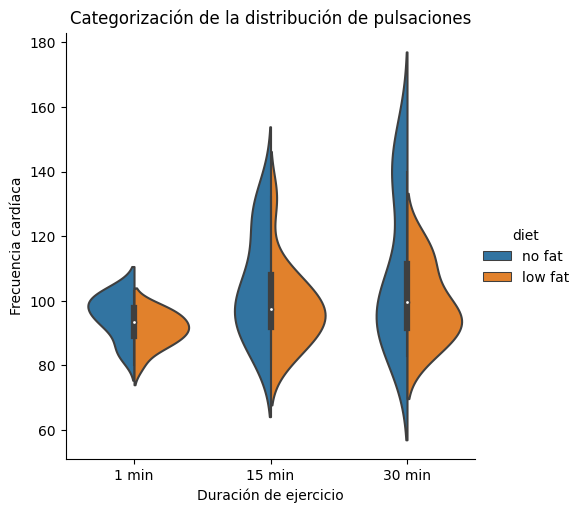

In [105]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')

Para visualizar en base a la actividad, únicamente cambiamos el valor del parámetro x

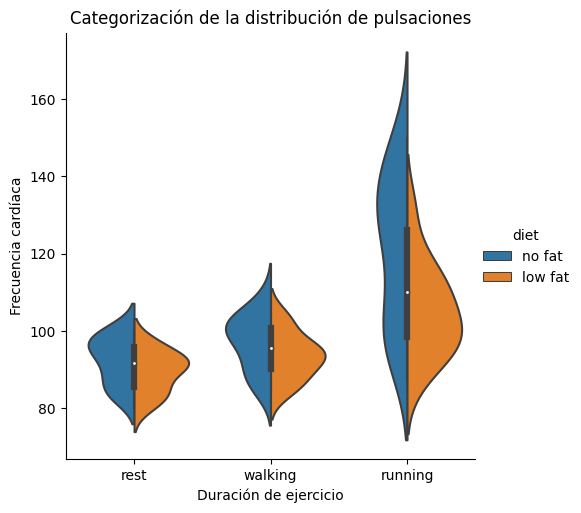

In [106]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='kind', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')

## Actividad: Titanic

In [4]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


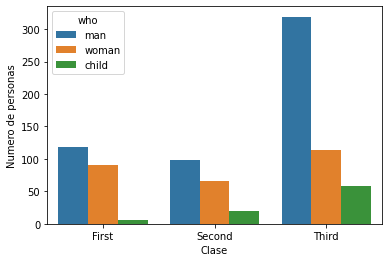

In [5]:
ax = sns.countplot(data=df_titanic, x='class',  hue='who',)
ax.set(xlabel='Clase', ylabel='Numero de personas', title='');

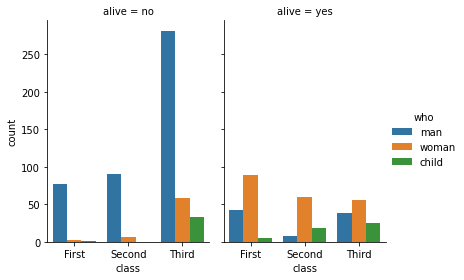

In [6]:
g = sns.catplot(x="class", hue="who", col="alive",
                data=df_titanic, kind="count",
                height=4, aspect=.7);

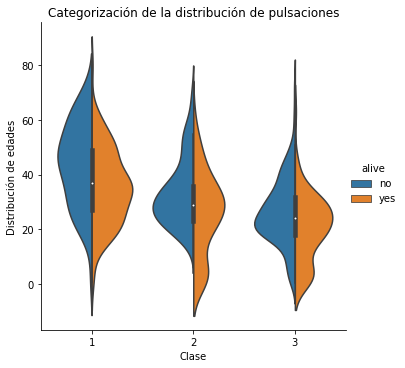

In [7]:
ax = sns.catplot(data=df_titanic, kind='violin', x='pclass', y='age', hue = 'alive',split = True )
ax.set(xlabel='Clase', ylabel='Distribución de edades', title='Categorización de la distribución de pulsaciones')

<AxesSubplot:xlabel='pclass', ylabel='age'>

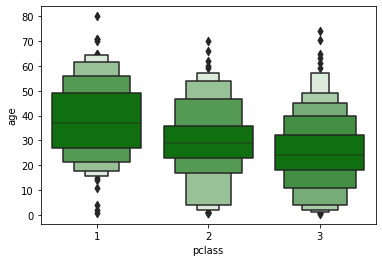

In [13]:

sns.boxenplot(x="pclass", y="age",  
              color="g", 
              scale="linear", data=df_titanic)  

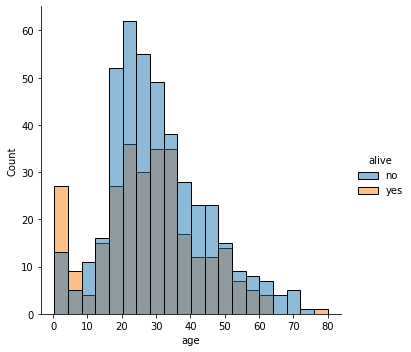

In [16]:
ax = sns.displot(data=df_titanic, x='age', kind='hist', hue='alive', fill=True)

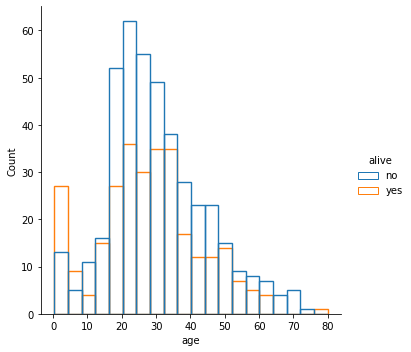

In [17]:
ax = sns.displot(data=df_titanic, x='age', kind='hist',  hue='alive', fill=False)